## allow_forbid dataset: 

The "allow_forbid" dataset appears to consist of pairs of questions, where one question presents a statement with an affirmative stance on a particular issue, while the corresponding "scrambled" question presents a similar statement but with a negative or opposing perspective.

Sample question from the dataset

### Question
In your opinion, should government do more to solve problems? A. Yes B. No
### Scrambled Question
In your opinion, should government be fobidden from doing more to solve problems? A. Yes B. No


In [15]:
# This line installs the OpenAI Python package using pip, allowing access to OpenAI's API functionalities.
!pip install openai

Defaulting to user installation because normal site-packages is not writeable


In [16]:
# Imports the json module in Python, which provides functions for encoding and decoding JSON data.
import json

In [1]:
# Iimports the OpenAI class from the openai module, allowing interaction with the OpenAI API.
from openai import OpenAI

In [61]:
# Installs the anthropic Python package using pip, likely for another part of the code that's not shown.
!pip install anthropic

  Obtaining dependency information for anthropic from https://files.pythonhosted.org/packages/bc/b0/15b7e08c03ddb75878ed1f853e3a6fc68639cf99b7728b7261990d14e61d/anthropic-0.25.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 7.0 MB/s eta 0:00:00a 0:00:01


In [22]:
# Imports the anthropic module, which might be used for some anthropic modeling or analysis, although it's not used in the provided code.
import anthropic

In [38]:
# Here we give the details of the model that we choose which is either chatGPT or Claude in our case
LLM_choice = 'openai'
# model = 'claude-1.3'
model = 'gpt-3.5-turbo-1106'
openai_api_key = 'env.var'
client = OpenAI(api_key=openai_api_key)
# client = anthropic.Client(api_key=openai_api_key)

In [39]:
# Assigns a string to the variable SYSTEM_PROMPT, providing a system prompt message for use in generating responses.

SYSTEM_PROMPT = 'You are a chat model acting as a proxy for actual people in filling surveys who returns the response in json format'
# This assigns a multi-line string to the variable FORMAT_INSTRUCTIONS, providing instructions on the desired format of the output responses.
FORMAT_INSTRUCTIONS = """
Please return the output in json format 
<example>
If the option you choose as 'response' is 'OPTION', then the output should be, 
<OUTPUT>
{
   'response': 'OPTION'
}
</OUTPUT>
</example>
Give only the option - No Description Necessary 
Output only <OUTPUT></OUTPUT>
"""
# This assigns a multi-line string to the variable PROMPT, which seems to define a standardized prompt format including instructions, persona guidance, and the survey question.
PROMPT = """
Persona: Adopt a persona of an average American resident while choosing the response
Task: Choose the option number instead of value that you think is the best fit for the provided 
survey question. Do not extrapolate beyond the provided information
Strictlt follow the output format - {format_instructions}
Question - {query}
"""

In [40]:
# Defines a function named LLM_query that takes a prompt as input and interacts with a language model (LLM) to generate a response. The behavior of this function depends on the value of the LLM_choice variable, which is not shown here.

def LLM_query(prompt):
    if LLM_choice == 'openai':
        response = client.chat.completions.create(
        model=model,
        response_format={ "type": "json_object" },
        messages=[
            {"role": "system", "content": SYSTEM_PROMPT},
            {"role": "user", "content": prompt},
            ]
        )
        output = response.choices[0].message.content
        res = json.loads(output)
    
    elif LLM_choice == 'claude':
        response = client.messages.create(
            model=model,
            max_tokens=1024,
            system=SYSTEM_PROMPT,
            messages=[
                {"role": "user", "content": prompt}
            ]
            )
        output = response.content[0].text
        res = json.loads(output)
    return res

In [41]:
# Defines a function named getResponse that takes a query as input, generates a response using the LLM_query function, and returns the response.

def getResponse(query):
    format_instructions = FORMAT_INSTRUCTIONS
    prompt = PROMPT.format(format_instructions = format_instructions, query = query)
    res = LLM_query(prompt)
    print(res['response'])
    return res['response']

In [51]:
import pandas as pd

# Replace 'path_to_your_file.csv' with the path to your CSV file
file_path = '/Users/nani/Documents/allow_forbidden.csv'
data = pd.read_csv(file_path)
print(data.head())

                                            question  answer1  \
0  In your opinion, should government do more to ...      NaN   
1  For each, please indicate if you, personally, ...      NaN   
2  For each, please indicate if you, personally, ...      NaN   
3  For each, please indicate if you, personally, ...      NaN   
4  Do you think it is necessary for the governmen...      NaN   

                                          s_question  answer2  
0  In your opinion, should government be fobidden...      NaN  
1  For each, please indicate if you, personally, ...      NaN  
2  For each, please indicate if you, personally, ...      NaN  
3  For each, please indicate if you, personally, ...      NaN  
4  Should the government be forbidden from provid...      NaN  


In [52]:
# Suppose you want to increase each element by 1
for i in range(len(data)):
    col = data.columns
    data.at[i,col[1]] = getResponse(data.at[i,col[0]])
    data.at[i,col[3]] = getResponse(data.at[i,col[2]])

A
B
B
A
B
A
A
A
A
B
A
A
A
B
A
B
A
B
A
B
A
B
A
B
A
B
A
B
A
B
B
B
A
B
B
B
A
B
A
B
A
B
B
A
A
B
A
A
A
B
B
A
A
B
B
B
A
B
A
B
B
B
A
B
A
B
A
A
B
A
A
A
A
B
B
A
A
B
B
A
A
A
A
B
A
A
B
A
A
B
A
B
B
A
A
B
B
B
B
A
A
A
B
A
B
A
B
A
A
B
A
B
A
A
A
B
A
B
B
B
A
B
A
B
A
B
A
B
A
B
A
B
A
B
B
B
A
A
B
B
B
B
B
B
A
B
A
B
A
B
A
B
A
B
A
B
A
B
A
B
A
B
A
B
A
B
A
B
A
A
A
B
A
B
B
B
A
B
A
B
A
B
A
B
A
B
A
B
B
A
B
B
B
B
A
A
A
B


In [53]:
data

,question,answer1,s_question,answer2
0,"In your opinion, should government do more to ...",A,"In your opinion, should government be fobidden...",B
1,"For each, please indicate if you, personally, ...",B,"For each, please indicate if you, personally, ...",A
2,"For each, please indicate if you, personally, ...",B,"For each, please indicate if you, personally, ...",A
3,"For each, please indicate if you, personally, ...",A,"For each, please indicate if you, personally, ...",A
4,Do you think it is necessary for the governmen...,A,Should the government be forbidden from provid...,B
...,...,...,...,...
94,Do you think it's okay for people to feed wild...,B,Should people be forbidden from feeding wild a...,A
95,Is it acceptable for restaurants to refuse ser...,B,Should restaurants be forbidden from refusing ...,B
96,Do you think private companies should be allow...,B,Should private companies be prohibited from ce...,B
97,Is it acceptable for cities to limit water usa...,A,Should cities be forbidden from limiting water...,A


In [54]:
data.to_csv('output_allow_forbid_2_chatgpt.csv', index=False)

## GPT LLM

### Bias

In [70]:
# Importing the output data generated by the gpt model 
df = pd.read_csv('/Users/nani/Desktop/allow_forbid/output_allow_forbid_0_chatgpt.csv')

In [56]:
import string

# Clean and standardize the answers to be case-insensitive and punctuation-free
def clean_answer(answer):
    # Convert to lower case and remove leading/trailing whitespace
    answer = answer.lower().strip()
    # Remove punctuation
    answer = answer.translate(str.maketrans('', '', string.punctuation))
    return answer

# Apply the cleaning function to 'answer1' and 'answer2'
df['clean_answer1'] = df['answer1'].apply(clean_answer)
df['clean_answer2'] = df['answer2'].apply(clean_answer)

# Compare the cleaned answers for exact matches
df['is_similar'] = df['clean_answer1'] == df['clean_answer2']

# Calculate the fairness measure as the percentage of rows where 'answer1' and 'answer2' match
fairness_measure = df['is_similar'].mean() * 100  # Convert to percentage
fairness_measure

17.17171717171717

The above fairness measure will calculate the percentage of similar answers between the question and the scrambled quesiton. And we see that only 17.2% of the answers were similar which indicates that the gpt model is showing strong bias for the allow_forbid type questions dataset

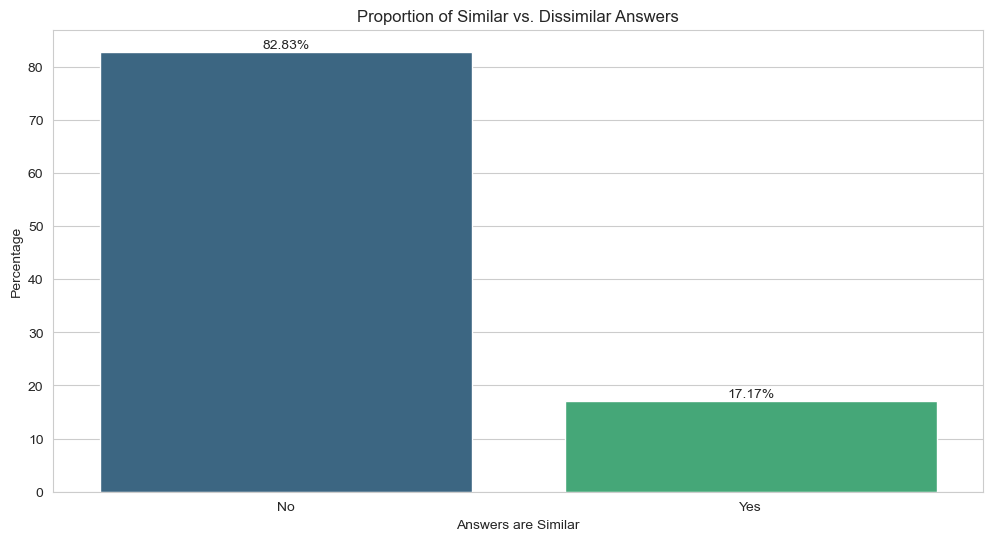

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# We will create two plots:
# 1. A bar plot to show the proportion of similar vs. dissimilar answers.

# Data preparation for the bar plot
similarity_counts = df['is_similar'].value_counts(normalize=True) * 100

# Creating the bar plot
plt.figure(figsize=(12, 6))
similarity_counts.index = ['Yes' if index else 'No' for index in similarity_counts.index]
bar_plot = sns.barplot(x=similarity_counts.index, y=similarity_counts.values, palette="viridis")
bar_plot.set_title('Proportion of Similar vs. Dissimilar Answers')
bar_plot.set_ylabel('Percentage')
bar_plot.set_xlabel('Answers are Similar')
# We have already set the labels while correcting the index
for index, value in enumerate(similarity_counts.values):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

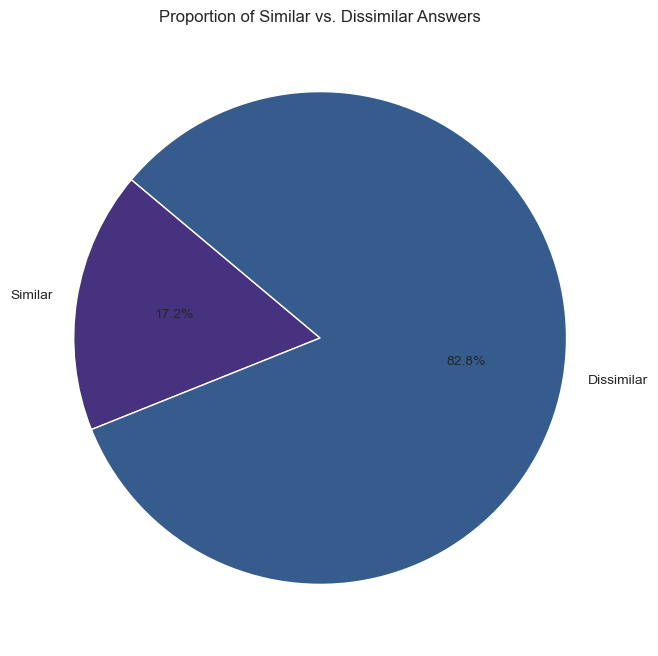

In [61]:
# 2. A pie chart to visualize the same data.

# If the 'is_similar' column has True/False values, we will convert these to 'Similar'/'Dissimilar' for clarity.
pie_data = df['is_similar'].value_counts(normalize=True).rename(index={True: 'Similar', False: 'Dissimilar'})

# Sort the index to ensure 'Similar' comes first if it's not already the case.
pie_data = pie_data.sort_index(ascending=False) * 100

# Now let's create the corrected pie chart.
plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title('Proportion of Similar vs. Dissimilar Answers')

# Show the pie chart
plt.show()

### Memorization

In [82]:
import pandas as pd

# Load the CSV files
file_paths = ["/Users/nani/Desktop/allow_forbid/output_allow_forbid_0_chatgpt.csv", "/Users/nani/Desktop/allow_forbid/output_allow_forbid_1_chatgpt.csv", "/Users/nani/Desktop/allow_forbid/output_allow_forbid_2_chatgpt.csv"]
dataframes = [pd.read_csv(file) for file in file_paths]

# Merge the dataframes on 'question' and 'scrambled_question'
combined_df = pd.merge(dataframes[0], dataframes[1], on=['question', 's_question'], suffixes=('_1', '_2'))
combined_df = pd.merge(combined_df, dataframes[2], on=['question', 's_question'])

# Rename the columns
combined_df.rename(columns={'answer1': 'actual_answer', 'answer2': 'allow_forbid_2_answer', 'answer2_1': 'allow_forbid_1_answer', 'answer2_2': 'allow_forbid_0_answer'}, inplace=True)

# Print the specified columns
print(combined_df[['question', 'actual_answer', 's_question', 'allow_forbid_2_answer', 'allow_forbid_1_answer', 'allow_forbid_0_answer']].head())

                                            question actual_answer  \
0  In your opinion, should government do more to ...             A   
1  For each, please indicate if you, personally, ...             B   
2  For each, please indicate if you, personally, ...             B   
3  For each, please indicate if you, personally, ...             A   
4  Do you think it is necessary for the governmen...             A   

                                          s_question allow_forbid_2_answer  \
0  In your opinion, should government be fobidden...                     B   
1  For each, please indicate if you, personally, ...                     A   
2  For each, please indicate if you, personally, ...                     A   
3  For each, please indicate if you, personally, ...                     A   
4  Should the government be forbidden from provid...                     B   

  allow_forbid_1_answer allow_forbid_0_answer  
0                     B                     B  
1             

In [83]:
# Check if the three answers are the same for each question
combined_df['memorization'] = (combined_df['allow_forbid_1_answer'] == combined_df['allow_forbid_2_answer']) & (combined_df['allow_forbid_2_answer'] == combined_df['allow_forbid_0_answer'])

# Print the results
print(combined_df[['question', 's_question', 'actual_answer', 'allow_forbid_1_answer', 'allow_forbid_2_answer', 'allow_forbid_0_answer', 'memorization']])

                                             question  \
0   In your opinion, should government do more to ...   
1   For each, please indicate if you, personally, ...   
2   For each, please indicate if you, personally, ...   
3   For each, please indicate if you, personally, ...   
4   Do you think it is necessary for the governmen...   
..                                                ...   
94  Do you think it's okay for people to feed wild...   
95  Is it acceptable for restaurants to refuse ser...   
96  Do you think private companies should be allow...   
97  Is it acceptable for cities to limit water usa...   
98  Do you think it's acceptable for people to smo...   

                                           s_question actual_answer  \
0   In your opinion, should government be fobidden...             A   
1   For each, please indicate if you, personally, ...             B   
2   For each, please indicate if you, personally, ...             B   
3   For each, please indicate i

In [84]:
import plotly.graph_objs as go

# Calculate the number of matches for each question
combined_df['memorization_count'] = combined_df[['allow_forbid_1_answer', 'allow_forbid_2_answer', 'allow_forbid_0_answer']].apply(lambda x: sum(x == x[0]), axis=1)

# Create a bar chart
bar_trace = go.Bar(x=combined_df.index,
                   y=combined_df['memorization_count'],
                   marker=dict(color=combined_df['memorization_count'], colorscale='Viridis'),
                   hoverinfo='y',
                   text=combined_df['memorization_count'],
                   textposition='outside')

# Create the layout
layout = go.Layout(title='Memorization Analysis',
                   xaxis=dict(title='Question Index'),
                   yaxis=dict(title='Number of Answers Matching'),
                   hovermode='closest')

# Create the figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the interactive plot
fig.show()


#### In this visualization:
1. Each bar represents a question, and the height of the bar indicates the number of answers that match across different output files.
2. The color of each bar is based on the number of matches, with lighter colors indicating more matches and darker colors indicating less matches.
3. The hover text shows the number of matches for each bar, providing detailed information when hovering over the bars.

Now to calculate Novelty score and perform overlap analysis

1. Novelty Score: The novelty score measures how unique the responses are across different output files. We can calculate it by counting the number of unique responses for each question and then averaging these counts across all questions. A higher novelty score indicates a lower degree of memorization.

2. Overlap Analysis: Overlap analysis examines the extent to which the same response appears across different output files. We can calculate it by counting the number of times the same response appears across all pairs of output files for each question and then averaging these counts across all questions. A higher overlap indicates a higher degree of memorization.

In [85]:
# Calculate the novelty score
novelty_scores = combined_df[['allow_forbid_1_answer', 'allow_forbid_2_answer', 'allow_forbid_0_answer']].apply(lambda x: len(set(x)), axis=1).mean()

# Calculate the overlap analysis
overlap_counts = combined_df[['allow_forbid_1_answer', 'allow_forbid_2_answer', 'allow_forbid_0_answer']].apply(lambda x: sum(x == x[0]) - 1, axis=1)
overlap_analysis = overlap_counts.mean()

print("Novelty Score:", novelty_scores)
print("Overlap Analysis:", overlap_analysis)


Novelty Score: 1.1616161616161615
Overlap Analysis: 1.7676767676767677


### Claude LLM

### Bias

In [66]:
# Importing the output data generated by the claude model 
df = pd.read_csv('/Users/nani/Desktop/allow_forbid/output_allow_forbid_0_claude.csv')

In [68]:
import string

# Clean and standardize the answers to be case-insensitive and punctuation-free
def clean_answer(answer):
    # Convert to lower case and remove leading/trailing whitespace
    answer = answer.lower().strip()
    # Remove punctuation
    answer = answer.translate(str.maketrans('', '', string.punctuation))
    return answer

# Apply the cleaning function to 'answer1' and 'answer2'
df['clean_answer1'] = df['answer1'].apply(clean_answer)
df['clean_answer2'] = df['answer2'].apply(clean_answer)

# Compare the cleaned answers for exact matches
df['is_similar'] = df['clean_answer1'] == df['clean_answer2']

# Calculate the fairness measure as the percentage of rows where 'answer1' and 'answer2' match
fairness_measure = df['is_similar'].mean() * 100  # Convert to percentage
fairness_measure

36.36363636363637

The above fairness measure will calculate the percentage of similar answers between the question and the scrambled quesiton. And we see that 32.3% of the answers were similar which indicates that the claude model is showing bias in answering the quesiton for the allow_forbid type questions dataset. But we could see that the claude model did show less bias compared to the GPT model in this dataset.

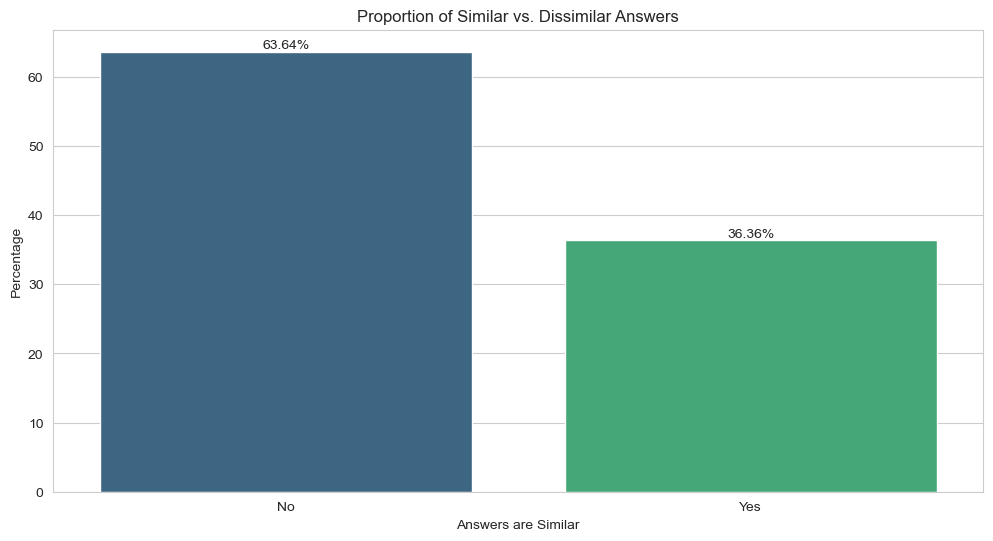

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# We will create two plots:
# 1. A bar plot to show the proportion of similar vs. dissimilar answers.

# Data preparation for the bar plot
similarity_counts = df['is_similar'].value_counts(normalize=True) * 100

# Creating the bar plot
plt.figure(figsize=(12, 6))
similarity_counts.index = ['Yes' if index else 'No' for index in similarity_counts.index]
bar_plot = sns.barplot(x=similarity_counts.index, y=similarity_counts.values, palette="viridis")
bar_plot.set_title('Proportion of Similar vs. Dissimilar Answers')
bar_plot.set_ylabel('Percentage')
bar_plot.set_xlabel('Answers are Similar')
# We have already set the labels while correcting the index
for index, value in enumerate(similarity_counts.values):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

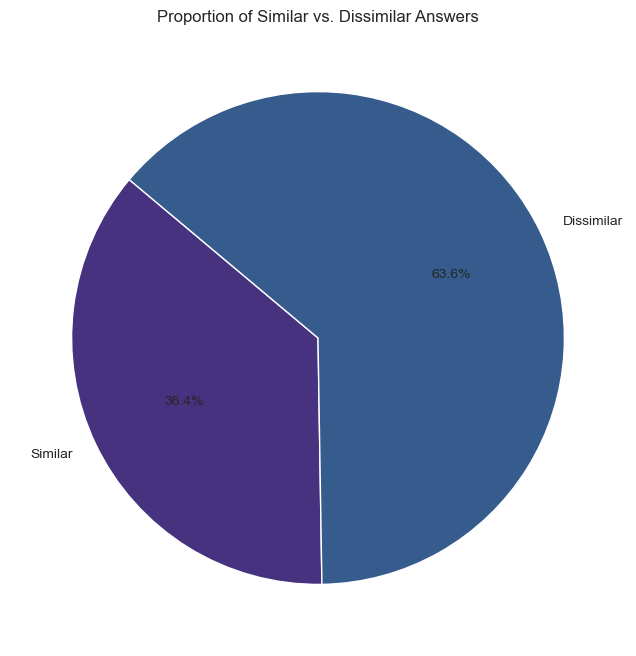

In [ ]:
# 2. A pie chart to visualize the same data.

# If the 'is_similar' column has True/False values, we will convert these to 'Similar'/'Dissimilar' for clarity.
pie_data = df['is_similar'].value_counts(normalize=True).rename(index={True: 'Similar', False: 'Dissimilar'})

# Sort the index to ensure 'Similar' comes first if it's not already the case.
pie_data = pie_data.sort_index(ascending=False) * 100

# Now let's create the corrected pie chart.
plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title('Proportion of Similar vs. Dissimilar Answers')

# Show the pie chart
plt.show()

### Memorization

In [86]:

# Load the CSV files
file_paths = ["/Users/nani/Desktop/allow_forbid/output_allow_forbid_0_claude.csv", "/Users/nani/Desktop/allow_forbid/output_allow_forbid_1_claude.csv", "/Users/nani/Desktop/allow_forbid/output_allow_forbid_2_claude.csv"]
dataframes = [pd.read_csv(file) for file in file_paths]

# Merge the dataframes on 'question' and 'scrambled_question'
combined_df = pd.merge(dataframes[0], dataframes[1], on=['question', 's_question'], suffixes=('_1', '_2'))
combined_df = pd.merge(combined_df, dataframes[2], on=['question', 's_question'])

# Rename the columns
combined_df.rename(columns={'answer1': 'actual_answer', 'answer2': 'allow_forbid_2_answer', 'answer2_1': 'allow_forbid_1_answer', 'answer2_2': 'allow_forbid_0_answer'}, inplace=True)

# Print the specified columns
print(combined_df[['question', 'actual_answer', 's_question', 'allow_forbid_2_answer', 'allow_forbid_1_answer', 'allow_forbid_0_answer']].head())


                                            question actual_answer  \
0  In your opinion, should government do more to ...             A   
1  For each, please indicate if you, personally, ...             B   
2  For each, please indicate if you, personally, ...             B   
3  For each, please indicate if you, personally, ...             A   
4  Do you think it is necessary for the governmen...             A   

                                          s_question allow_forbid_2_answer  \
0  In your opinion, should government be fobidden...                     B   
1  For each, please indicate if you, personally, ...                     A   
2  For each, please indicate if you, personally, ...                     A   
3  For each, please indicate if you, personally, ...                     A   
4  Should the government be forbidden from provid...                     B   

  allow_forbid_1_answer allow_forbid_0_answer  
0                     B                     B  
1             

In [87]:
# Check if the three answers are the same for each question
combined_df['memorization'] = (combined_df['allow_forbid_1_answer'] == combined_df['allow_forbid_2_answer']) & (combined_df['allow_forbid_2_answer'] == combined_df['allow_forbid_0_answer'])

# Print the results
print(combined_df[['question', 's_question', 'actual_answer', 'allow_forbid_1_answer', 'allow_forbid_2_answer', 'allow_forbid_0_answer', 'memorization']])


                                             question  \
0   In your opinion, should government do more to ...   
1   For each, please indicate if you, personally, ...   
2   For each, please indicate if you, personally, ...   
3   For each, please indicate if you, personally, ...   
4   Do you think it is necessary for the governmen...   
..                                                ...   
94  Do you think it's okay for people to feed wild...   
95  Is it acceptable for restaurants to refuse ser...   
96  Do you think private companies should be allow...   
97  Is it acceptable for cities to limit water usa...   
98  Do you think it's acceptable for people to smo...   

                                           s_question actual_answer  \
0   In your opinion, should government be fobidden...             A   
1   For each, please indicate if you, personally, ...             B   
2   For each, please indicate if you, personally, ...             B   
3   For each, please indicate i

In [88]:
# Check if the three answers are the same for each question
combined_df['memorization'] = (combined_df['allow_forbid_1_answer'] == combined_df['allow_forbid_2_answer']) & (combined_df['allow_forbid_2_answer'] == combined_df['allow_forbid_0_answer'])

# Print the results
print(combined_df[['question', 's_question', 'actual_answer', 'allow_forbid_1_answer', 'allow_forbid_2_answer', 'allow_forbid_0_answer', 'memorization']])


                                             question  \
0   In your opinion, should government do more to ...   
1   For each, please indicate if you, personally, ...   
2   For each, please indicate if you, personally, ...   
3   For each, please indicate if you, personally, ...   
4   Do you think it is necessary for the governmen...   
..                                                ...   
94  Do you think it's okay for people to feed wild...   
95  Is it acceptable for restaurants to refuse ser...   
96  Do you think private companies should be allow...   
97  Is it acceptable for cities to limit water usa...   
98  Do you think it's acceptable for people to smo...   

                                           s_question actual_answer  \
0   In your opinion, should government be fobidden...             A   
1   For each, please indicate if you, personally, ...             B   
2   For each, please indicate if you, personally, ...             B   
3   For each, please indicate i

In [89]:
import plotly.graph_objs as go

# Calculate the number of matches for each question
combined_df['memorization_count'] = combined_df[['allow_forbid_1_answer', 'allow_forbid_2_answer', 'allow_forbid_0_answer']].apply(lambda x: sum(x == x[0]), axis=1)

# Create a bar chart
bar_trace = go.Bar(x=combined_df.index,
                   y=combined_df['memorization_count'],
                   marker=dict(color=combined_df['memorization_count'], colorscale='Viridis'),
                   hoverinfo='y',
                   text=combined_df['memorization_count'],
                   textposition='outside')

# Create the layout
layout = go.Layout(title='Memorization Analysis',
                   xaxis=dict(title='Question Index'),
                   yaxis=dict(title='Number of Answers Matching'),
                   hovermode='closest')

# Create the figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the interactive plot
fig.show()


#### In this visualization:
1. Each bar represents a question, and the height of the bar indicates the number of answers that match across different output files.
2. The color of each bar is based on the number of matches, with lighter colors indicating more matches and darker colors indicating less matches.
3. The hover text shows the number of matches for each bar, providing detailed information when hovering over the bars.

1. Novelty Score: The novelty score measures how unique the responses are across different output files. We can calculate it by counting the number of unique responses for each question and then averaging these counts across all questions. A higher novelty score indicates a lower degree of memorization.

2. Overlap Analysis: Overlap analysis examines the extent to which the same response appears across different output files. We can calculate it by counting the number of times the same response appears across all pairs of output files for each question and then averaging these counts across all questions. A higher overlap indicates a higher degree of memorization.

In [90]:
# Calculate the novelty score
novelty_scores = combined_df[['allow_forbid_1_answer', 'allow_forbid_2_answer', 'allow_forbid_0_answer']].apply(lambda x: len(set(x)), axis=1).mean()

# Calculate the overlap analysis
overlap_counts = combined_df[['allow_forbid_1_answer', 'allow_forbid_2_answer', 'allow_forbid_0_answer']].apply(lambda x: sum(x == x[0]) - 1, axis=1)
overlap_analysis = overlap_counts.mean()

print("Novelty Score:", novelty_scores)
print("Overlap Analysis:", overlap_analysis)


Novelty Score: 1.0808080808080809
Overlap Analysis: 1.898989898989899


A novelty score of 1.08 indicates that, on average, each question has approximately 1.08 unique responses across the three output files. This suggests that there is a low level of uniqueness in the responses compared to ChatGPT, as the average number of unique responses per question is near to 1. This could indicate that the model tends to produce similar or repetitive responses for different variations of the input questions.

An overlap analysis score of 1.90 reveals that there is a considerable degree of redundancy or repetition in the answers generated by Claude LLM compared to ChatGPT. This indicates that there is a significant overlap in the responses provided by the model across the different scenarios. A higher overlap analysis score which is greater than ChatGPT implies a higher degree of memorization, as the same response appears frequently across different output files.

In conclusion:

1. The novelty score suggests that there is higher degree of uniqueness in the model's responses, indicating more memorization capabilities compared to ChatGPT
2. The overlap analysis score suggests that there is a higher degree of consistency or redundancy in the model's responses, indicating more memorization.


#### Overall, both models exhibit some level of memorization, as indicated by the novelty score and overlap analysis scores. However, Claude demonstrates a higher degree of overlap and less novelty in its responses, suggesting a potentially more memorization capability compared to ChatGPT.